# Chat Auswertung
___

In [1]:
from __future__ import unicode_literals
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sys
import datetime
import common.chat
import common.live

In [2]:
#config
reload(sys)
sys.setdefaultencoding('utf-8')
matplotlib.style.use('ggplot')
%matplotlib inline

#constants
CHAT_DATA_DIRECTORY = '/home/marcel/Development/rbtvdata/chat'
LIVE_DATA_DIRECTORY = '/home/marcel/Development/rbtvdata/live'

#chat duell dates
chatDuellDates1 = ['2015-12-01', '2015-12-08', '2015-12-15', '2015-12-15', '2015-12-22', '2016-01-12', '2016-02-02', '2016-02-09', '2016-02-16', '2016-02-23', '2016-03-01', '2016-03-08', '2016-03-15']
chatDuellDates2 = ['2016-06-28', '2016-07-05', '2016-07-12', '2016-07-19', '2016-07-26', '2016-08-02', '2016-08-09', '2016-08-23', '2016-08-30', '2016-09-06', '2016-09-13', '2016-09-20', '2016-09-27']

## Chat Daten
___

In [3]:
#load chat data
chat = common.chat.load(CHAT_DATA_DIRECTORY)

#create additional columns
chat['day'] = chat.index.date

In [4]:
chat.head()

,username,message,day
datetime,,,
2015-08-05 02:00:09,tadloss,!sendeplan,2015-08-05
2015-08-05 02:00:09,moobot,Angaben zum aktuellen Programm findet Ihr: Auf...,2015-08-05
2015-08-05 02:00:10,dersendeplan,@tadloss (01:00) Blue Estate >> (02:30) Darkes...,2015-08-05
2015-08-05 02:00:17,dedalos_stormbring,"@Gunvolf, Brav. Kappa",2015-08-05
2015-08-05 02:00:18,unclesreefermadness,ist da nicht schmatzen gäng und ein kompliment,2015-08-05


In [5]:
chat.tail()

,username,message,day
datetime,,,
2016-10-04 15:04:36,Steen Rai,"finds gut, dass Kliemann wieder kommt",2016-10-04
2016-10-04 15:04:43,Sille 1988,@ElectroVolt Mir egal wenn du es glaubst. Aber...,2016-10-04
2016-10-04 15:04:46,Sniatch,Man lernt immer was neues,2016-10-04
2016-10-04 15:04:53,Don Mixote,Ich will Dead Rising sehen 😖,2016-10-04
2016-10-04 15:04:53,Don Mixote,Ich will Dead Rising sehen 😖,2016-10-04


In [6]:
#group chat data by date
chatGrouped = chat.groupby('day')

#count messages
chatMessages = chatGrouped.size().to_frame('messages')

#adjust data type
chatMessages = chatMessages.set_index(pd.to_datetime(chatMessages.index, format='%Y-%m-%d'))

#resample
chatMessages = chatMessages.resample('1D').mean().fillna(float('NaN'))

#30-day mean
chatMessages['messages_30d_mean'] = chatMessages.rolling(window=30, min_periods=1).mean()

chatMessages

,messages,messages_30d_mean
day,,
2015-08-05,74921.0,74921.000000
2015-08-06,59003.0,66962.000000
2015-08-07,71043.0,68322.333333
2015-08-08,64954.0,67480.250000
2015-08-09,30041.0,59992.400000
2015-08-10,19528.0,53248.333333
2015-08-11,32905.0,50342.142857
2015-08-12,35466.0,48482.625000
2015-08-13,35096.0,46995.222222


In [7]:
#group messages by date
chatGrouped = chat.groupby('day')

#count (unique) users
chatParticipants = chatGrouped.agg({'username': pd.Series.nunique})
chatParticipants.columns = ['participants']

#adjust data type
chatParticipants = chatParticipants.set_index(pd.to_datetime(chatParticipants.index, format='%Y-%m-%d'))

#resample
chatParticipants = chatParticipants.resample('1D').mean().fillna(float('NaN'))

#30-day mean
chatParticipants['participants_30d_mean'] = chatParticipants.rolling(window=30, min_periods=1).mean()

chatParticipants

,participants,participants_30d_mean
day,,
2015-08-05,8634.0,8634.000000
2015-08-06,6565.0,7599.500000
2015-08-07,6982.0,7393.666667
2015-08-08,6173.0,7088.500000
2015-08-09,3868.0,6444.400000
2015-08-10,2895.0,5852.833333
2015-08-11,4122.0,5605.571429
2015-08-12,4232.0,5433.875000
2015-08-13,3980.0,5272.333333


## Live Daten
___

In [8]:
#load live data
live = common.live.load(LIVE_DATA_DIRECTORY)

#create additional column
live['day'] = live.index.date

In [9]:
live.head()

,viewers,day
datetime,,
2015-01-15 18:37:00,757.000000,2015-01-15
2015-01-15 18:38:00,2379.166667,2015-01-15
2015-01-15 18:39:00,10490.000000,2015-01-15
2015-01-15 18:40:00,13232.000000,2015-01-15
2015-01-15 18:41:00,13232.000000,2015-01-15


In [10]:
live.tail()

,viewers,day
datetime,,
2016-10-04 15:56:00,2014.0,2016-10-04
2016-10-04 15:57:00,2021.0,2016-10-04
2016-10-04 15:58:00,2024.0,2016-10-04
2016-10-04 15:59:00,1966.0,2016-10-04
2016-10-04 16:00:00,1924.0,2016-10-04


In [11]:
#group live data by date
liveGrouped = live.groupby('day')

#calculate mean for each day
liveMean = liveGrouped.apply(lambda group: group['viewers'].mean())
liveMean = liveMean.to_frame('viewers')

#adjust data type
liveMean = liveMean.set_index(pd.to_datetime(liveMean.index, format='%Y-%m-%d'))

#30-day mean
liveMean['viewers_30d_mean'] = liveMean.rolling(window=30, min_periods=1).mean()

liveMean

,viewers,viewers_30d_mean
day,,
2015-01-15,39952.809155,39952.809155
2015-01-16,15516.815972,27734.812564
2015-01-17,10779.276811,22082.967313
2015-01-18,9721.064583,18992.491630
2015-01-19,9326.186453,17059.230595
2015-01-20,10493.045326,15964.866383
2015-01-21,12030.206944,15402.772178
2015-01-22,11261.631944,14885.129649
2015-01-23,10431.520139,14390.284147


## Diagramme
___

In [12]:
#join data
joinedData = chatParticipants.join(liveMean)

#participants/viewers ratio
joinedData['ratio'] = joinedData['participants'] / joinedData['viewers']

#30-day mean
joinedData['ratio_30d_mean'] = joinedData['ratio'].rolling(window=30, min_periods=1).mean()

joinedData

,participants,participants_30d_mean,viewers,viewers_30d_mean,ratio,ratio_30d_mean
day,,,,,,
2015-08-05,8634.0,8634.000000,8330.963194,4578.148876,1.036375,1.036375
2015-08-06,6565.0,7599.500000,7601.338194,4681.865856,0.863664,0.950019
2015-08-07,6982.0,7393.666667,6499.343750,4696.481644,1.074262,0.991434
2015-08-08,6173.0,7088.500000,5999.536806,4755.686921,1.028913,1.000803
2015-08-09,3868.0,6444.400000,3790.958333,4760.810972,1.020322,1.004707
2015-08-10,2895.0,5852.833333,3324.626389,4760.438426,0.870775,0.982385
2015-08-11,4122.0,5605.571429,4055.067361,4677.979074,1.016506,0.987259
2015-08-12,4232.0,5433.875000,4570.020833,4664.703125,0.926035,0.979606
2015-08-13,3980.0,5272.333333,4245.817361,4638.187708,0.937393,0.974916


(0, 140000.0)

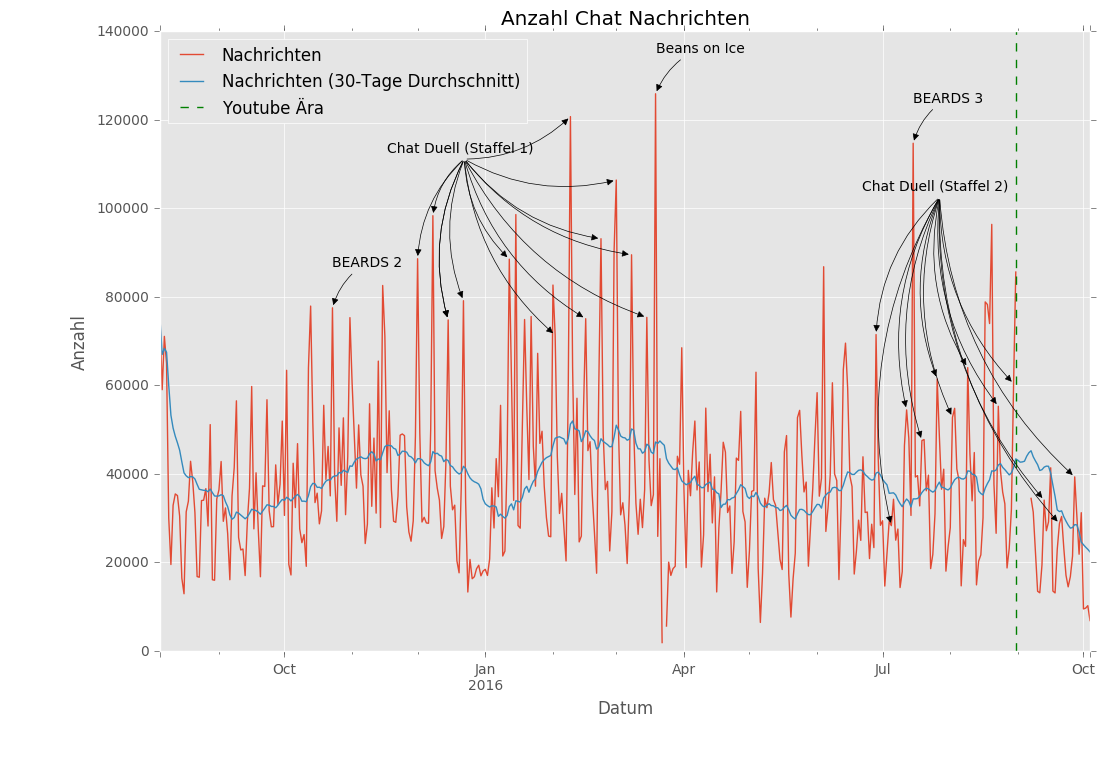

In [13]:
plot = chatMessages.plot(figsize=(12, 8), title='Anzahl Chat Nachrichten')
plot.set_xlabel('Datum')
plot.set_ylabel('Anzahl')

plot.axvline(datetime.datetime(2016, 8, 31, 23, 59, 59), color='g', linestyle='--', label='Youtube Ära')

legend = plot.legend(loc=2)
legend.get_texts()[0].set_text('Nachrichten')
legend.get_texts()[1].set_text('Nachrichten (30-Tage Durchschnitt)')


arrowStyle = dict(arrowstyle="-|>",
                  connectionstyle='arc3,rad=0.2',
                  linewidth = 0.5,
                  color = 'black')

#annotate chat duell (season 1)
plot.annotate('Chat Duell (Staffel 1)', xy=(0.35, 0.80), xycoords='figure fraction')
for date in chatDuellDates1:
    datapoint = chatMessages.loc[date]
    plot.annotate('', 
                  xy=(date, datapoint['messages']), xycoords='data', 
                  xytext=(0.42, 0.79), textcoords='figure fraction',
                  arrowprops=arrowStyle)

#annotate chat duell (season 2)
plot.annotate('Chat Duell (Staffel 2)', xy=(0.78, 0.75), xycoords='figure fraction')
for date in chatDuellDates2:
    datapoint = chatMessages.loc[date]
    plot.annotate('', 
                  xy=(date, datapoint['messages']), xycoords='data', 
                  xytext=(0.85, 0.74), textcoords='figure fraction',
                  arrowprops=arrowStyle)

#annotate beans on rice
date = '2016-03-19'
datapoint = chatMessages.loc[date]
plot.annotate('Beans on Ice', 
              xy=(date, datapoint['messages']), xycoords='data', 
              xytext=(0, 30), textcoords='offset points',
              arrowprops=arrowStyle)

#annotate beards
date = '2015-10-23'
datapoint = chatMessages.loc[date]
plot.annotate('BEARDS 2', 
              xy=(date, datapoint['messages']), xycoords='data', 
              xytext=(0, 30), textcoords='offset points',
              arrowprops=arrowStyle)

date = '2016-07-15'
datapoint = chatMessages.loc[date]
plot.annotate('BEARDS 3', 
              xy=(date, datapoint['messages']), xycoords='data', 
              xytext=(0, 30), textcoords='offset points',
              arrowprops=arrowStyle)

plt.ylim(ymin=0)

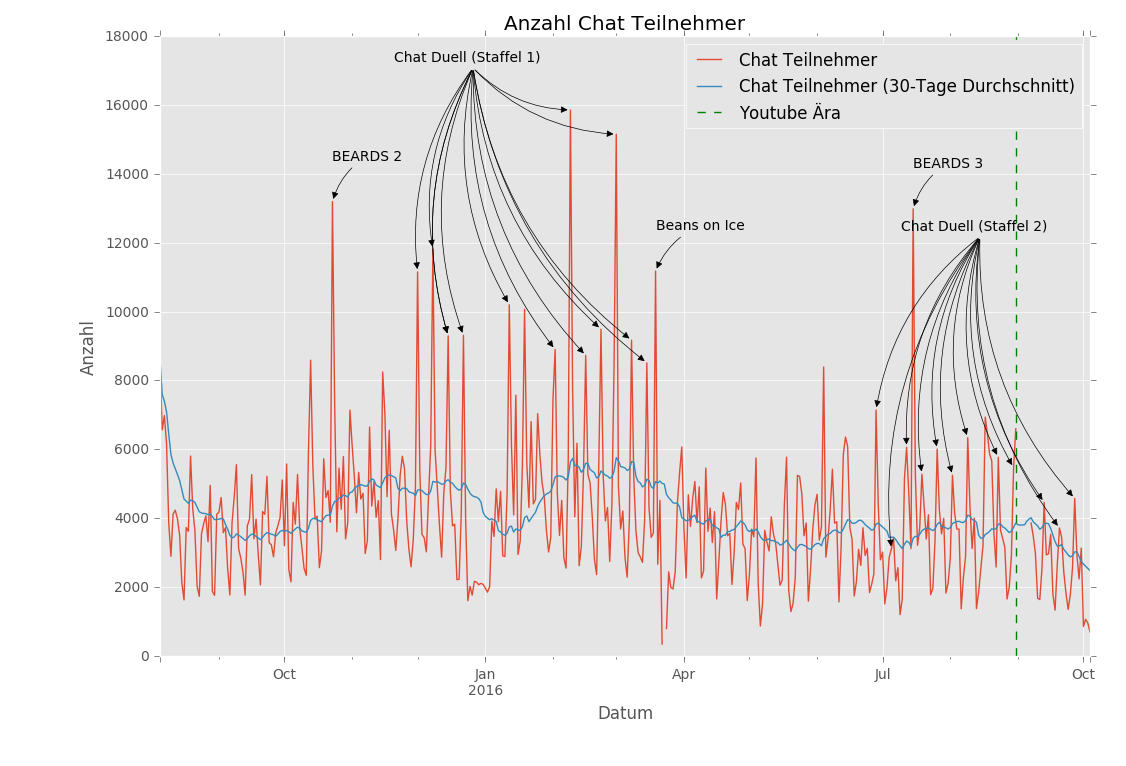

In [14]:
plot = chatParticipants.plot(kind='line', figsize=(12, 8), title='Anzahl Chat Teilnehmer')
plot.set_xlabel('Datum')
plot.set_ylabel('Anzahl')

plot.axvline(datetime.datetime(2016, 8, 31, 23, 59, 59), color='g', linestyle='--', label='Youtube Ära')

legend = plot.legend(loc=1)
legend.get_texts()[0].set_text('Chat Teilnehmer')
legend.get_texts()[1].set_text('Chat Teilnehmer (30-Tage Durchschnitt)')

plt.ylim(ymin=0)
plt.ylim(ymax=18000)

arrowStyle = dict(arrowstyle="-|>",
                  connectionstyle='arc3,rad=0.2',
                  linewidth = 0.5,
                  color = 'black')

#annotate chat duell (season 1)
plot.annotate('Chat Duell (Staffel 1)', xy=(0.35, 0.92), xycoords='figure fraction')
for date in chatDuellDates1:
    datapoint = chatParticipants.loc[date]
    plot.annotate('', 
                  xy=(date, datapoint['participants']), xycoords='data', 
                  xytext=(0.42, 0.91), textcoords='figure fraction',
                  arrowprops=arrowStyle)

#annotate chat duell (season 2)
plot.annotate('Chat Duell (Staffel 2)', xy=(0.80, 0.70), xycoords='figure fraction')
for date in chatDuellDates2:
    datapoint = chatParticipants.loc[date]
    plot.annotate('', 
                  xy=(date, datapoint['participants']), xycoords='data', 
                  xytext=(0.87, 0.69), textcoords='figure fraction',
                  arrowprops=arrowStyle)

#annotate beans on rice
date = '2016-03-19'
datapoint = chatParticipants.loc[date]
plot.annotate('Beans on Ice', 
              xy=(date, datapoint['participants']), xycoords='data', 
              xytext=(0, 30), textcoords='offset points',
              arrowprops=arrowStyle)

#annotate beards
date = '2015-10-23'
datapoint = chatParticipants.loc[date]
plot.annotate('BEARDS 2', 
              xy=(date, datapoint['participants']), xycoords='data', 
              xytext=(0, 30), textcoords='offset points',
              arrowprops=arrowStyle)

date = '2016-07-15'
datapoint = chatParticipants.loc[date]
plot.annotate('BEARDS 3', 
              xy=(date, datapoint['participants']), xycoords='data', 
              xytext=(0, 30), textcoords='offset points',
              arrowprops=arrowStyle)

plot

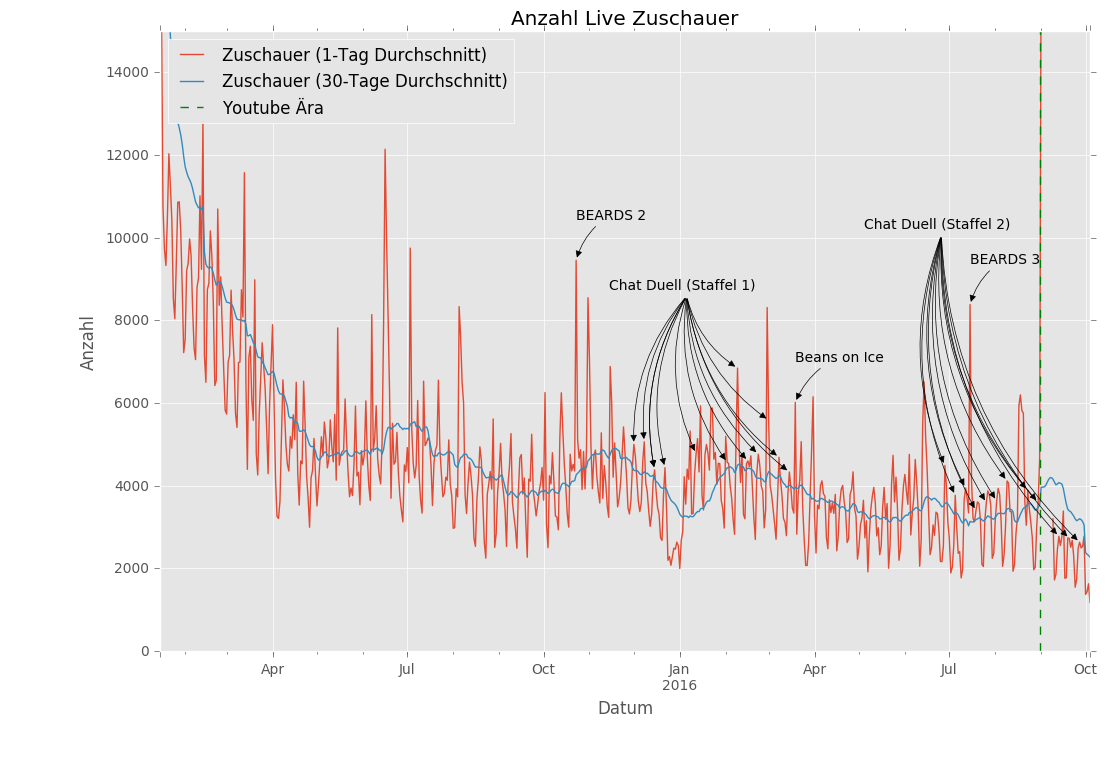

In [15]:
plot = liveMean.plot(figsize=(12, 8), title='Anzahl Live Zuschauer')
plot.set_xlabel('Datum')
plot.set_ylabel('Anzahl')

plot.axvline(datetime.datetime(2016, 8, 31, 23, 59, 59), color='g', linestyle='--', label='Youtube Ära')

legend = plot.legend(loc=2)
legend.get_texts()[0].set_text('Zuschauer (1-Tag Durchschnitt)')
legend.get_texts()[1].set_text('Zuschauer (30-Tage Durchschnitt)')

plt.ylim(ymin=0)
plt.ylim(ymax=15000)

arrowStyle = dict(arrowstyle="-|>",
                  connectionstyle='arc3,rad=0.2',
                  linewidth = 0.5,
                  color = 'black')

#annotate chat duell (season 1)
plot.annotate('Chat Duell (Staffel 1)', xy=(0.55, 0.62), xycoords='figure fraction')
for date in chatDuellDates1:
    datapoint = liveMean.loc[date]
    plot.annotate('', 
                  xy=(date, datapoint['viewers']), xycoords='data', 
                  xytext=(0.62, 0.61), textcoords='figure fraction',
                  arrowprops=arrowStyle)

#annotate chat duell (season 2)
plot.annotate('Chat Duell (Staffel 2)', xy=(0.78, 0.70), xycoords='figure fraction')
for date in chatDuellDates2:
    datapoint = liveMean.loc[date]
    plot.annotate('', 
                  xy=(date, datapoint['viewers']), xycoords='data', 
                  xytext=(0.85, 0.69), textcoords='figure fraction',
                  arrowprops=arrowStyle)

#annotate beans on rice
date = '2016-03-19'
datapoint = liveMean.loc[date]
plot.annotate('Beans on Ice', 
              xy=(date, datapoint['viewers']), xycoords='data', 
              xytext=(0, 30), textcoords='offset points',
              arrowprops=arrowStyle)

#annotate beards
date = '2015-10-23'
datapoint = liveMean.loc[date]
plot.annotate('BEARDS 2', 
              xy=(date, datapoint['viewers']), xycoords='data', 
              xytext=(0, 30), textcoords='offset points',
              arrowprops=arrowStyle)

date = '2016-07-15'
datapoint = liveMean.loc[date]
plot.annotate('BEARDS 3', 
              xy=(date, datapoint['viewers']), xycoords='data', 
              xytext=(0, 30), textcoords='offset points',
              arrowprops=arrowStyle)

plot

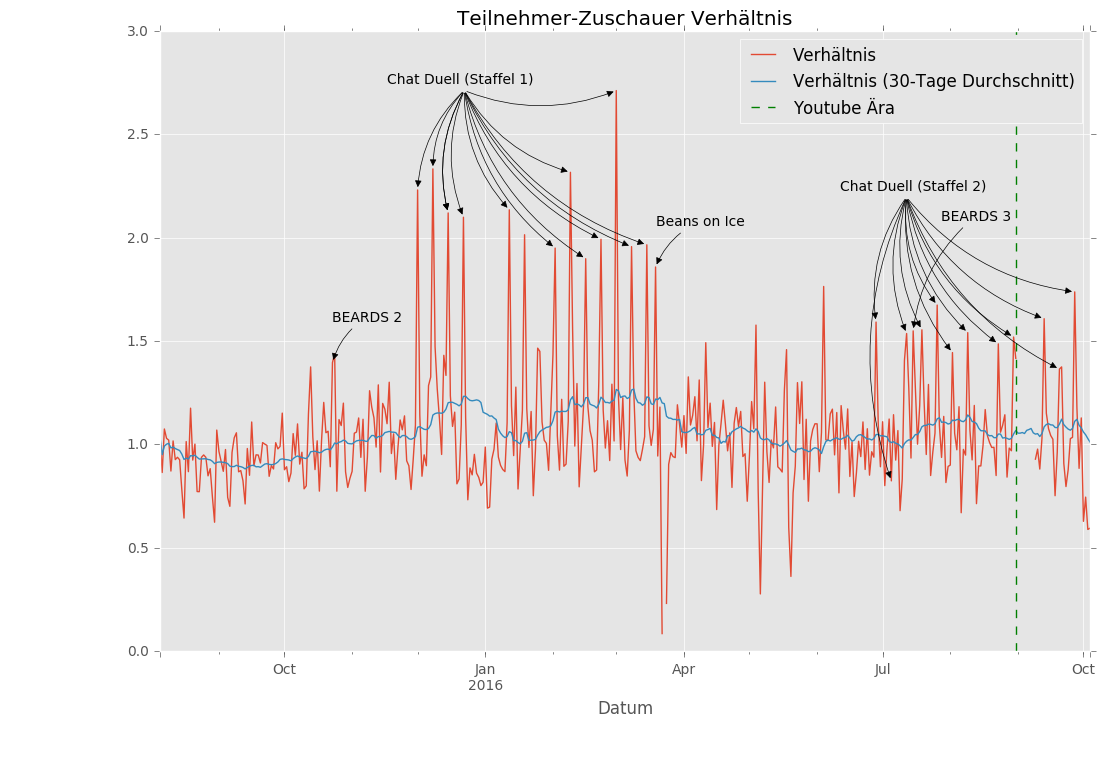

In [16]:
plot = joinedData[['ratio', 'ratio_30d_mean']].plot(figsize=(12, 8), title='Teilnehmer-Zuschauer Verhältnis')
plot.set_xlabel('Datum')

plot.axvline(datetime.datetime(2016, 8, 31, 23, 59, 59), color='g', linestyle='--', label='Youtube Ära')

legend = plot.legend(loc=1)
legend.get_texts()[0].set_text('Verhältnis')
legend.get_texts()[1].set_text('Verhältnis (30-Tage Durchschnitt)')

plt.ylim(ymin=0)

arrowStyle = dict(arrowstyle="-|>",
                  connectionstyle='arc3,rad=0.2',
                  linewidth = 0.5,
                  color = 'black')

#annotate chat duell (season 1)
plot.annotate('Chat Duell (Staffel 1)', xy=(0.35, 0.89), xycoords='figure fraction')
for date in chatDuellDates1:
    datapoint = joinedData.loc[date]
    plot.annotate('', 
                  xy=(date, datapoint['ratio']), xycoords='data', 
                  xytext=(0.42, 0.88), textcoords='figure fraction',
                  arrowprops=arrowStyle)

#annotate chat duell (season 2)
plot.annotate('Chat Duell (Staffel 2)', xy=(0.76, 0.75), xycoords='figure fraction')
for date in chatDuellDates2:
    datapoint = joinedData.loc[date]
    plot.annotate('', 
                  xy=(date, datapoint['ratio']), xycoords='data', 
                  xytext=(0.82, 0.74), textcoords='figure fraction',
                  arrowprops=arrowStyle)

#annotate beans on rice
date = '2016-03-19'
datapoint = joinedData.loc[date]
plot.annotate('Beans on Ice', 
              xy=(date, datapoint['ratio']), xycoords='data', 
              xytext=(0, 30), textcoords='offset points',
              arrowprops=arrowStyle)

#annotate beards
date = '2015-10-23'
datapoint = joinedData.loc[date]
plot.annotate('BEARDS 2', 
              xy=(date, datapoint['ratio']), xycoords='data', 
              xytext=(0, 30), textcoords='offset points',
              arrowprops=arrowStyle)

date = '2016-07-15'
datapoint = joinedData.loc[date]
plot.annotate('BEARDS 3', 
              xy=(date, datapoint['ratio']), xycoords='data', 
              xytext=(20, 80), textcoords='offset points',
              arrowprops=arrowStyle)

plot